In [5]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [6]:
question=pd.read_csv('C:/Users/이승현/Downloads/kaggle-survey-2017/schema.csv')
question.head()
# question.shape

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [7]:
mcq=pd.read_csv('C:/Users/이승현/Downloads/kaggle-survey-2017/multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.shape

(16716, 228)

In [9]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

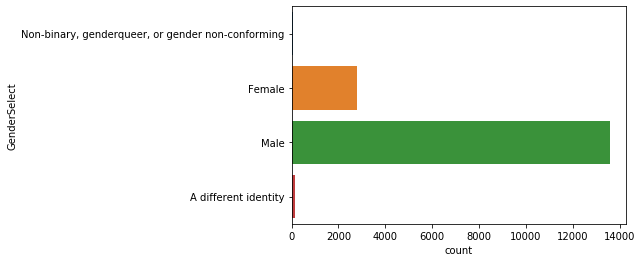

In [10]:
sns.countplot(y='GenderSelect',data=mcq)

In [11]:
con_df=pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
con_df['국가']=con_df.index

con_df.columns=['응답수','국가']
con_df=con_df.reset_index().drop('index',axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [13]:
age_df=pd.DataFrame(mcq['Age'].value_counts())

age_df['나이']=age_df.index

age_df.columns=['응답','나이']
age_df=age_df.reset_index().drop('index',axis=1)
age_df.head(20)

# 응답수라고 안나옴

,응답,나이
0,969,25.0
1,898,24.0
2,886,26.0
3,842,27.0
4,839,23.0
5,778,30.0
6,761,28.0
7,731,29.0
8,694,22.0
9,597,31.0


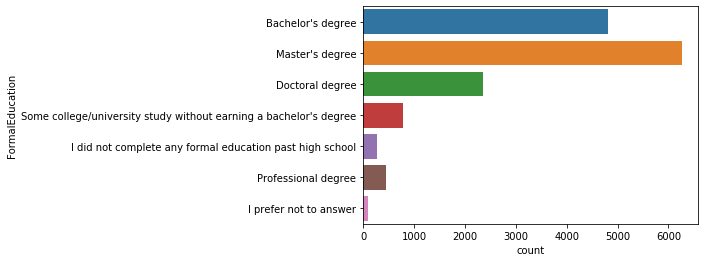

In [14]:
sns.countplot(y='FormalEducation',data=mcq)

In [15]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


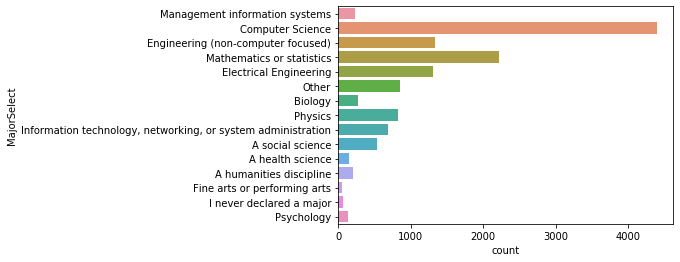

In [16]:
sns.countplot(y='MajorSelect',data=mcq)

In [17]:
major_df=pd.DataFrame(mcq['MajorSelect'].value_counts())
major_df_percent=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

mcq_merge=major_df.merge(major_df_percent*100,left_index=True,right_index=True)
# percent=major_df_percent.iloc[2,:]
mcq_merge.columns=['응답수','비율']

mcq_merge

,응답수,비율
Computer Science,4397,33.107447
Mathematics or statistics,2220,16.715609
Engineering (non-computer focused),1339,10.082072
Electrical Engineering,1303,9.811008
Other,848,6.385061
Physics,830,6.249529
"Information technology, networking, or system administration",693,5.217981
A social science,531,3.998193
Biology,274,2.063098
Management information systems,237,1.784504


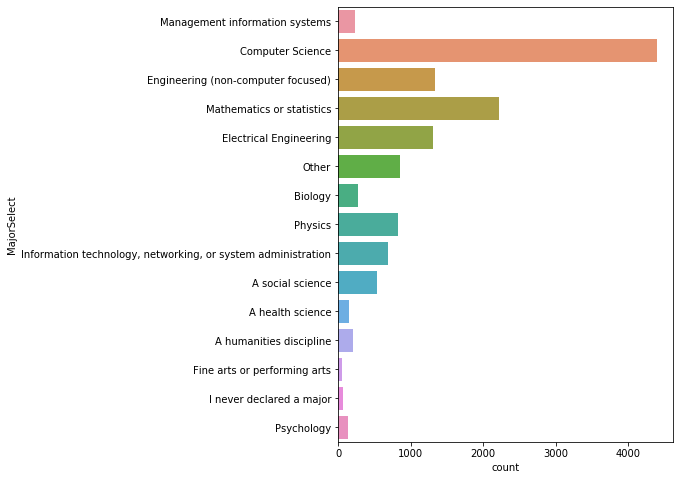

In [18]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

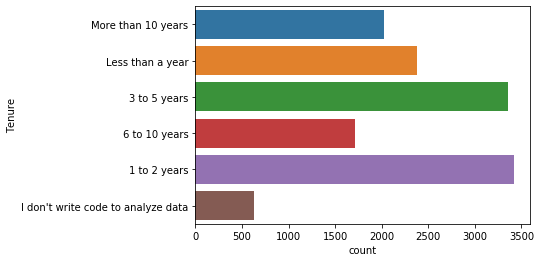

In [19]:
sns.countplot(y='Tenure',data=mcq)

In [20]:
korea=mcq.loc[(mcq['Country']=='South Korea')]

Text(0.5, 1.0, 'Korean')

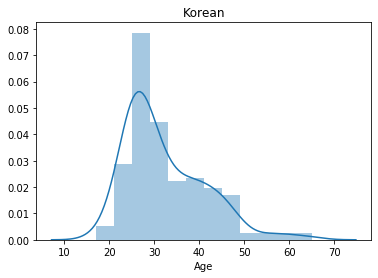

In [21]:
sns.distplot(korea['Age'].dropna())
plt.title('Korean')

In [22]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean Male')

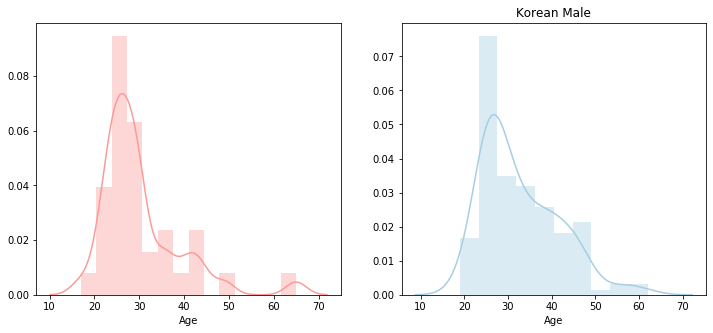

In [23]:
figure,(ax1,ax2)=plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('Korean Male')

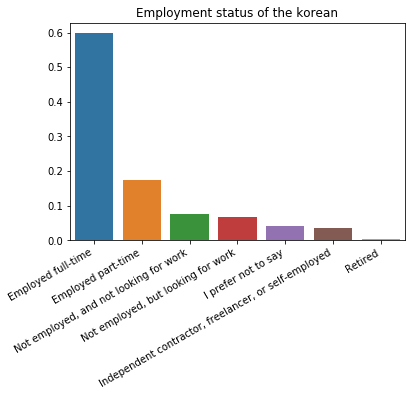

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

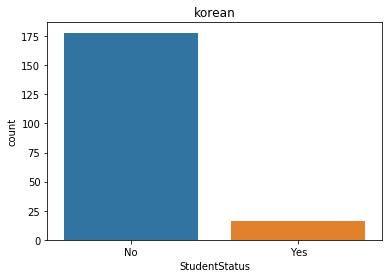

In [25]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [26]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


# 데이터 사이언스에서 주목 받을 것들?

In [27]:
mcq_ml_count=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts()
)
mcq_ml_percent=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True)
)
mcq_ml_table=mcq_ml_count.merge(mcq_ml_percent,left_index=True,right_index=True).head(20)

mcq_ml_table.columns=['응답수','비율']

mcq_ml_table



,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


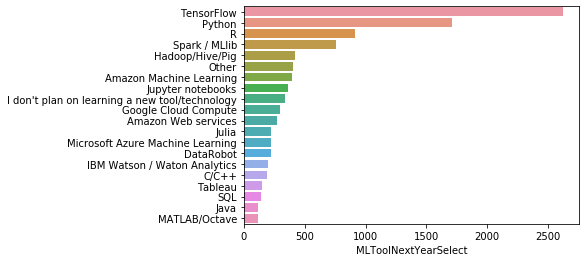

In [28]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)

# 어디서 데이터 사이언스를 배워야 할까?

In [29]:
mcq['LearningPlatformSelect']=mcq['LearningPlatformSelect'].astype('str').apply(lambda x:x.split(','))
s=mcq.apply(
    lambda x:pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1,drop=True)
s.name='platform'

데이터사이언스를 배우는 플랫폼을 s에 저장, 밑에 bar 그래프 형식으로 나열하였다

Kaggle,other courses,Stack Overflow 순인데 Kaggle에서 설문조사를 진행하였기 때문에
Kaggle이 1위인것으로 보인다

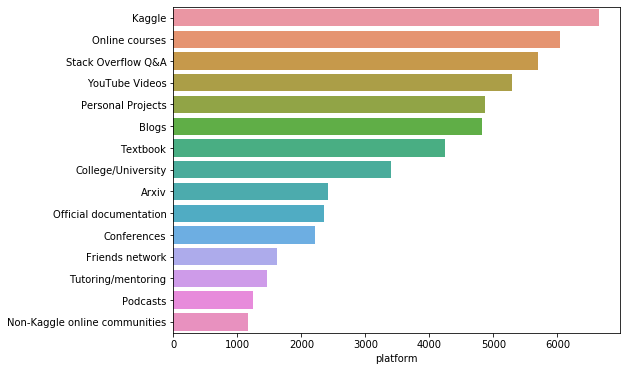

In [30]:
plt.figure(figsize=(8,6))
data=s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index,x=data)

In [31]:
# 설명 내용과 누구에게 물어 봤는지 확인

qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


qc.Column에서 LearningCategory의 문구를 가진 것을 qc라는 변수에 그룹화 하였다

In [37]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

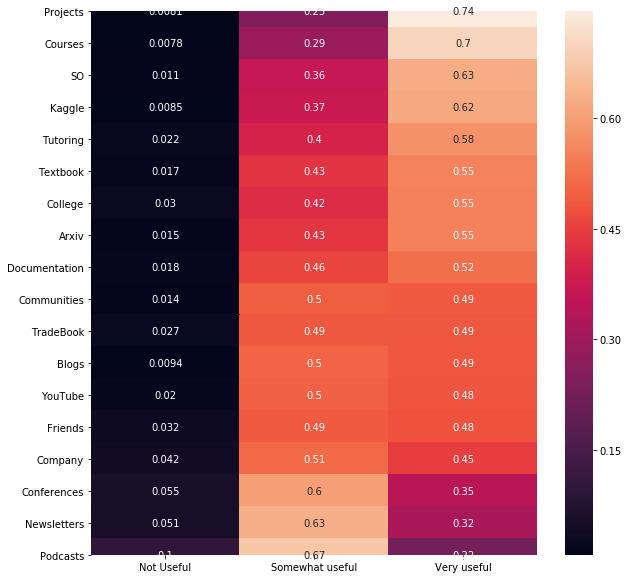

In [38]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

다음 heatmap은 1에 가까울 수록 데이터와 상관성이 있는 것인데 LearningPlatformUsefullness라는 변수를 통하여 나타낸 그래프이며 Projects 0.74,Courses 0.7,SO 순이다. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

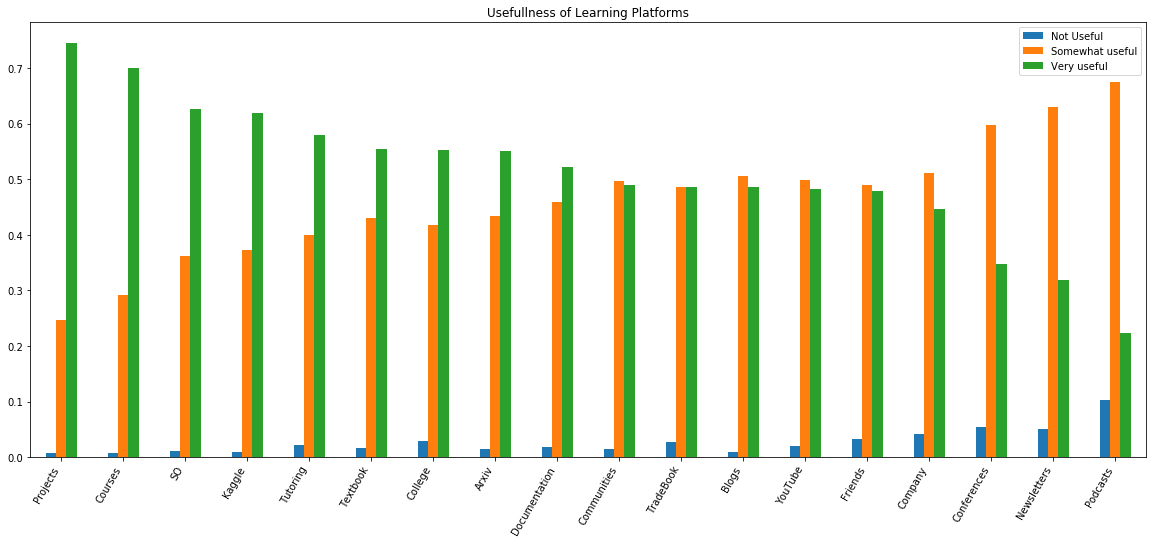

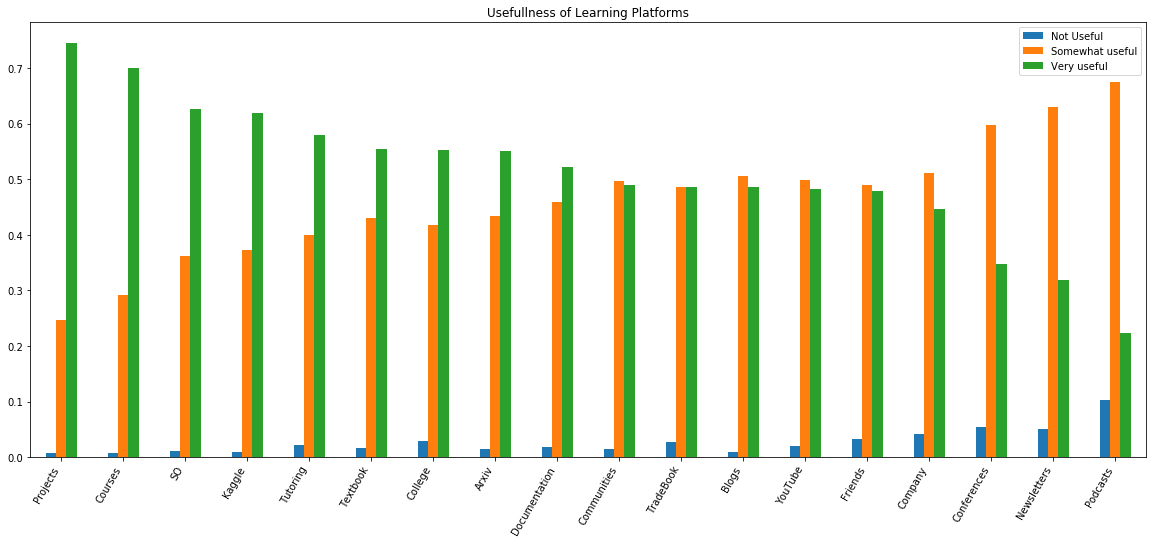

In [51]:
# fdf.plot(kind='bar', figsize=(20.8),
#          title="Usefullness of Learning Platforms")
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")


plt.xticks(rotation=60,ha='right')

# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')


In [53]:
cat_features=[x for x in mcq.columns if x.find(
'LearningCategory')!=-1]

cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [59]:
cdf={}

for feature in cat_features:
    cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()
    
cdf=pd.Series(cdf)
cdf


    

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

Pie 그래프는 Seaborn에서 제공하지 않음.Matplotlib를 이용
cdf의 변수에 LearningCategory의 평균값
SelfTaught가 가장 많음

pie형식에서 actopct='%1.11f%%'에서 소수점 1까지


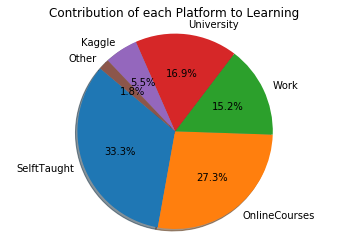

In [64]:


plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [65]:
qc=question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')
]

print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [68]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

# mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
#     'HardwarePersonalProjectsSelect'].shape

(4206,)

In [70]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [71]:
s = s[s != 'nan']

In [72]:
pd.DataFrame(s.value_counts()
)

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


# 데이터 사이언스에 얼마나 공부를 하는지

sns.countplot(index는 공부시간,hue는 EmploymentStatus로 나타낸다)

직장인,일자리를 구하고 있는 사람을 따로 분리하여 분석
fulltime=mcq.loc[],look_job=mcq.loc[]
으로 구분

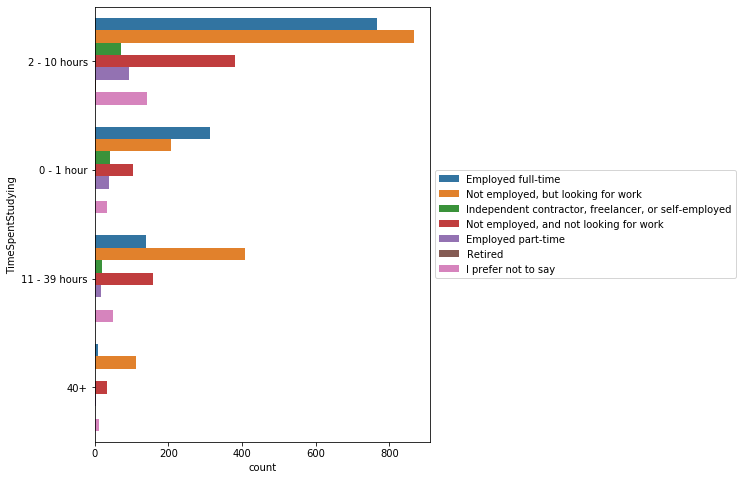

In [73]:
plt.figure(figsize=(6,8))

sns.countplot(y='TimeSpentStudying',
             data=mcq,
             hue='EmploymentStatus').legend(loc='center left',bbox_to_anchor=(1,0.5))

In [83]:
fulltime=mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(fulltime.shape)
look_job=mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(look_job.shape)



(10897, 228)
(2110, 228)


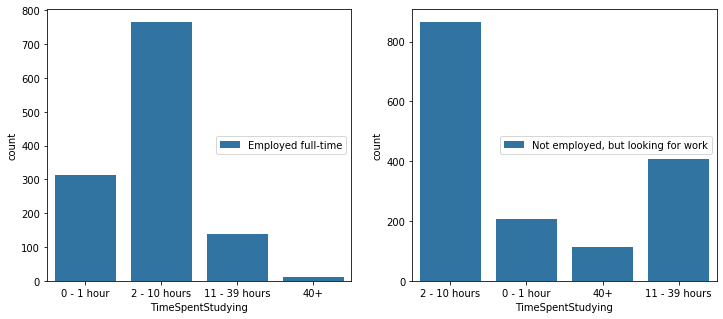

In [93]:
figure,(ax1,ax2)=plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
             data=fulltime,
             hue='EmploymentStatus',
             ax=ax1).legend(loc='center right',
                           bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying',
             data=look_job,
             hue='EmploymentStatus',
             ax=ax2).legend(loc='center right',
                           bbox_to_anchor=(1,0.5))

